In [3]:
import random
import os
from datasets import load_dataset
import pandas as pd

In [ ]:
df = pd.read_json('dataset_dolma_v6_sample/v1_5r2_sample-0078.json.gz', lines=True)


In [13]:
df.head()

,added,created,id,metadata,source,text,totalwords,toxicity,Unnamed: 8,Unnamed: 9,domain,subdomain,full,totaldocuments
0,2023-04-07T09:43:17.148889+00:00,2020-06-07T07:21:36Z,https://www.walikali.com/elizabeth-chambers/,"{'bucket': 'head', 'cc_segment': 'crawl-data/C...",common-crawl,"Elizabeth Chambers was born on August 18, 1982...",425,0,NaN,NaN,walikali.com,www,www.walikali.com,1
1,2023-04-06T20:51:56.987390+00:00,2020-06-01T16:57:12Z,http://www.fullfrontalfatherhood.com/deal-nagg...,"{'bucket': 'head', 'cc_segment': 'crawl-data/C...",common-crawl,Do you feel like second class citizens in your...,896,1,NaN,NaN,fullfrontalfatherhood.com,www,www.fullfrontalfatherhood.com,1
2,2023-04-07T06:34:28.255431+00:00,2020-06-06T11:36:26Z,https://www.ispu.org/india-and-iran-similar-ex...,"{'bucket': 'head', 'cc_segment': 'crawl-data/C...",common-crawl,Recent reports coming out of New Delhi indicat...,97,0,NaN,NaN,ispu.org,www,www.ispu.org,1
3,2023-04-06T17:30:45.440367+00:00,2020-05-30T12:53:43Z,https://www.vibe.com/photos/usher-hard-ii-love...,"{'bucket': 'head', 'cc_segment': 'crawl-data/C...",common-crawl,Usher's latest album was met with mixed review...,304,1,NaN,NaN,vibe.com,www,www.vibe.com,1
4,2023-04-07T02:23:35.123130+00:00,2020-06-03T13:35:00Z,https://www.tmgadventure.com/activity/wildlife...,"{'bucket': 'head', 'cc_segment': 'crawl-data/C...",common-crawl,"You know human beings, and which country they ...",234,0,NaN,NaN,tmgadventure.com,www,www.tmgadventure.com,1


In [49]:
df['totalwords'] = [len(x.split()) for x in df['text'].tolist()]

In [50]:
import tldextract
# === GET DOMAIN AND SUBDOMAIN ===  
domains = []
subdomains = []
full = []
for id in df.id.values:
    extract = tldextract.extract(id)
    domains.append(extract.domain + '.' + extract.suffix)
    subdomains.append(extract.subdomain)
    full.append(extract.subdomain + '.' + extract.domain + '.' + extract.suffix)
df["domain"] = domains
df["subdomain"] = subdomains
df["full"] = full
df['totaldocuments'] = 1

In [52]:
sample_df = df.sample(n=50, random_state=42)
sample_df.to_csv('csv/dolma_sample_50_0078.csv', index=False)


In [42]:
sample_df.describe(include='all')

,added,created,id,metadata,source,text,totalwords,domain,subdomain,full,totaldocuments
count,50,50,50,50,50,50,50.00000,50,50,50,50.0
unique,50,50,50,50,1,50,NaN,50,11,50,NaN
top,2023-04-07T09:43:17.148889+00:00,2020-06-07T07:21:36Z,https://www.walikali.com/elizabeth-chambers/,"{'bucket': 'head', 'cc_segment': 'crawl-data/C...",common-crawl,"Elizabeth Chambers was born on August 18, 1982...",NaN,walikali.com,www,www.walikali.com,NaN
freq,1,1,1,1,50,1,NaN,1,28,1,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,445.62000,NaN,NaN,NaN,1.0
std,NaN,NaN,NaN,NaN,NaN,NaN,351.71132,NaN,NaN,NaN,0.0
min,NaN,NaN,NaN,NaN,NaN,NaN,6.00000,NaN,NaN,NaN,1.0
25%,NaN,NaN,NaN,NaN,NaN,NaN,184.25000,NaN,NaN,NaN,1.0
50%,NaN,NaN,NaN,NaN,NaN,NaN,410.00000,NaN,NaN,NaN,1.0
75%,NaN,NaN,NaN,NaN,NaN,NaN,576.50000,NaN,NaN,NaN,1.0


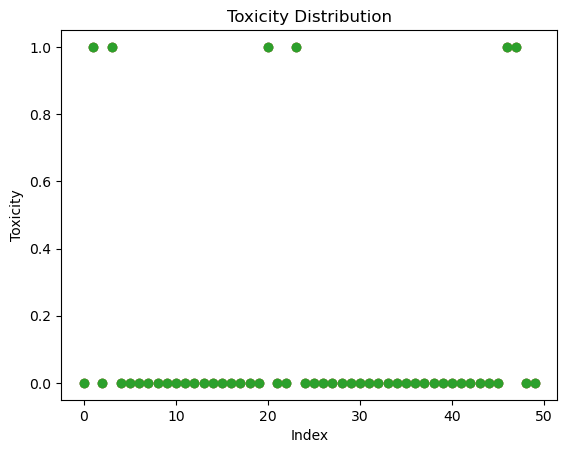

In [19]:
import matplotlib.pyplot as plt

# Scatter plot
plt.scatter(df.index, df['toxicity'])
plt.xlabel('Index')
plt.ylabel('Toxicity')
plt.title('Toxicity Distribution')

plt.show()


In [3]:
from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.20  Python-3.9.18 torch-2.2.2+cpu CPU
Setup complete  (20 CPUs, 31.7 GB RAM, 684.4/932.7 GB disk)


In [4]:
from ultralytics import YOLO

from IPython.display import display, Image

In [5]:
%cd {HOME}
!yolo task=detect mode=predict model=yolov8n.pt conf=0.25 source='https://media.roboflow.com/notebooks/examples/dog.jpeg' save=True

[WinError 2] The system cannot find the file specified: '{HOME}'
c:\Users\nsidh\Documents\Learning\SFU\Spring2024\CMPT419\Assignments\Assignment3



  0%|          | 0.00/6.23M [00:00<?, ?B/s]
 15%|█▌        | 960k/6.23M [00:00<00:00, 9.13MB/s]
 30%|███       | 1.88M/6.23M [00:00<00:00, 9.37MB/s]
 46%|████▌     | 2.84M/6.23M [00:00<00:00, 9.11MB/s]
 61%|██████    | 3.77M/6.23M [00:00<00:00, 9.26MB/s]
 75%|███████▍  | 4.66M/6.23M [00:00<00:00, 9.25MB/s]
 89%|████████▉ | 5.55M/6.23M [00:00<00:00, 8.95MB/s]
100%|██████████| 6.23M/6.23M [00:00<00:00, 9.09MB/s]

Ultralytics YOLOv8.0.20  Python-3.9.18 torch-2.2.2+cpu CPU
YOLOv8n summary (fused): 168 layers, 3151904 parameters, 0 gradients, 8.7 GFLOPs

  0%|          | 0.00/104k [00:00<?, ?B/s]
100%|██████████| 104k/104k [00:00<00:00, 7.28MB/s]
image 1/1 C:\Users\nsidh\Documents\Learning\SFU\Spring2024\CMPT419\Assignments\Assignment3\dog.jpeg: 640x384 1 person, 1 car, 1 dog, 182.6ms
Speed: 0.0ms pre-process, 182.6ms inference, 5.2ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs\detect\predict


In [10]:
!yolo task=detect mode=train model=yolov8n.pt data=freedomtech/freedomtech/data.yaml epochs=100 imgsz=800 plots=True



^C


Ultralytics YOLOv8.0.20  Python-3.9.18 torch-2.2.2+cpu CPU
yolo\engine\trainer: task=detect, mode=train, model=yolov8s.yaml, data=freedomtech/freedomtech/data.yaml, epochs=100, patience=50, batch=16, imgsz=800, save=True, cache=False, device=, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=False, val=True, save_json=False, save_hybrid=False, conf=0.001, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=ultralytics/assets/, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, optimize=False, int8=False, dynamic=False, simplify=False, opset=17, workspace=4,